In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

data = "OceanCleaned.csv"
df = pd.read_csv(data)

df.head()

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2,pH (total scale),pH QF
0,SOFS_142E_46S,-47.004,142.283,4/20/2021,15:17,379.0,2,1.88,410.1,2,...,379.8,410.9,369.2,399.4,-30.3,370.5,400.9,-30.4,8.36308,5.0
1,SOFS_142E_46S,-47.004,142.283,4/20/2021,18:17,381.7,2,2.58,409.8,2,...,382.7,410.9,370.6,397.9,-27.3,372.0,399.4,-27.4,8.36294,5.0
2,SOFS_142E_46S,-47.004,142.283,4/20/2021,21:17,382.2,2,2.73,408.6,2,...,383.3,409.7,370.0,395.5,-25.5,371.4,397.0,-25.6,8.36300,5.0
3,SOFS_142E_46S,-47.004,142.283,4/21/2021,0:17,383.3,2,2.87,408.7,2,...,384.4,409.8,369.8,394.3,-24.5,371.1,395.7,-24.6,8.36302,5.0
4,SOFS_142E_46S,-47.004,142.283,4/21/2021,3:17,385.1,2,2.73,409.1,2,...,386.2,410.2,370.8,393.9,-23.1,372.2,395.3,-23.2,8.36292,5.0


In [3]:
df.columns

Index(['Mooring Name', 'Latitude', 'Longitude', 'Date', 'Time',
       'xCO2 SW (wet) (umol/mol)', 'CO2 SW QF', 'H2O SW (mmol/mol)',
       'xCO2 Air (wet) (umol/mol)', 'CO2 Air QF', 'H2O Air (mmol/mol)',
       'Licor Atm Pressure (hPa)', 'Licor Temp (C)', 'MAPCO2 %O2', 'SST (C)',
       'Salinity', 'xCO2 SW (dry) (umol/mol)', 'xCO2 Air (dry) (umol/mol)',
       'fCO2 SW (sat) uatm', 'fCO2 Air (sat) uatm', 'dfCO2',
       'pCO2 SW (sat) uatm', 'pCO2 Air (sat) uatm', 'dpCO2',
       'pH (total scale)', 'pH QF'],
      dtype='object')

In [5]:
df.drop(['xCO2 SW (wet) (umol/mol)', 'CO2 SW QF', 'H2O SW (mmol/mol)','xCO2 Air (wet) (umol/mol)', 'CO2 Air QF', 'H2O Air (mmol/mol)',
    'Licor Atm Pressure (hPa)', 'Licor Temp (C)','xCO2 SW (dry) (umol/mol)', 'xCO2 Air (dry) (umol/mol)','fCO2 Air (sat) uatm',
    'pCO2 Air (sat) uatm', 'pH QF'],axis = 1,inplace=True)

In [7]:
df.tail()

,Mooring Name,Latitude,Longitude,Date,Time,MAPCO2 %O2,SST (C),Salinity,fCO2 SW (sat) uatm,dfCO2,pCO2 SW (sat) uatm,dpCO2,pH (total scale)
16923,SOFS_142W_46S,-46.774,141.992,7/13/2012,18:17,99.12,10.718768,34.666241,375.519513,-19.838353,376.952426,-19.913951,8.362448
16924,SOFS_142W_46S,-46.774,141.992,7/13/2012,21:17,99.17,10.718768,34.666241,375.519513,-19.838353,376.952426,-19.913951,8.362448
16925,SOFS_142W_46S,-46.774,141.992,7/14/2012,0:17,99.27,9.178000,34.478000,370.900000,-10.100000,372.400000,-10.100000,8.362910
16926,SOFS_142W_46S,-46.774,141.992,7/14/2012,3:17,99.31,9.213000,34.487000,370.800000,-8.900000,372.300000,-8.900000,8.362920
16927,SOFS_142W_46S,-46.774,141.992,7/14/2012,6:17,99.41,9.207000,34.486000,370.500000,-8.800000,372.000000,-8.800000,8.362950


In [9]:
print(df.columns)

Index(['Mooring Name', 'Latitude', 'Longitude', 'Date', 'Time', 'MAPCO2 %O2',
       'SST (C)', 'Salinity', 'fCO2 SW (sat) uatm', 'dfCO2',
       'pCO2 SW (sat) uatm', 'dpCO2', 'pH (total scale)'],
      dtype='object')


In [11]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Function to categorize time into more specific intervals
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 9:
        return 'Dawn'
    elif 9 <= hour < 12:
        return 'Early Morning'
    elif 12 <= hour < 15:
        return 'Mid-Morning'
    elif 15 <= hour < 18:
        return 'Early Afternoon'
    elif 18 <= hour < 20:
        return 'Late Afternoon'
    elif 20 <= hour < 22:
        return 'Early Evening'
    elif 22 <= hour < 24:
        return 'Late Evening'

# Apply the function to categorize time
df['Time_of_Day'] = df['Time'].apply(categorize_time)

columns_order = ['Mooring Name', 'Latitude', 'Longitude', 'Date', 'Time', 'Time_of_Day', 
                 'MAPCO2 %O2', 'SST (C)', 'Salinity', 'fCO2 SW (sat) uatm', 
                 'dfCO2', 'pCO2 SW (sat) uatm', 'dpCO2', 'pH (total scale)']
df = df[columns_order]


In [13]:
df.head()

,Mooring Name,Latitude,Longitude,Date,Time,Time_of_Day,MAPCO2 %O2,SST (C),Salinity,fCO2 SW (sat) uatm,dfCO2,pCO2 SW (sat) uatm,dpCO2,pH (total scale)
0,SOFS_142E_46S,-47.004,142.283,4/20/2021,15,Early Afternoon,98.69,14.048,35.298,369.2,-30.3,370.5,-30.4,8.36308
1,SOFS_142E_46S,-47.004,142.283,4/20/2021,18,Late Afternoon,98.53,14.054,35.303,370.6,-27.3,372.0,-27.4,8.36294
2,SOFS_142E_46S,-47.004,142.283,4/20/2021,21,Early Evening,98.45,14.035,35.291,370.0,-25.5,371.4,-25.6,8.36300
3,SOFS_142E_46S,-47.004,142.283,4/21/2021,0,Late Night,98.55,13.959,35.283,369.8,-24.5,371.1,-24.6,8.36302
4,SOFS_142E_46S,-47.004,142.283,4/21/2021,3,Late Night,98.54,13.695,35.249,370.8,-23.1,372.2,-23.2,8.36292


In [15]:
columns_order = ['Mooring Name', 'Latitude', 'Longitude', 'Date', 'Time', 'Time_of_Day', 'MAPCO2 %O2', 'SST (C)', 'Salinity',
                 'fCO2 SW (sat) uatm','dfCO2', 'pCO2 SW (sat) uatm', 'dpCO2', 'pH (total scale)']
df = df[columns_order]


In [17]:
print(df.dtypes)

Mooring Name           object
Latitude              float64
Longitude             float64
Date                   object
Time                    int32
Time_of_Day            object
MAPCO2 %O2            float64
SST (C)               float64
Salinity              float64
fCO2 SW (sat) uatm    float64
dfCO2                 float64
pCO2 SW (sat) uatm    float64
dpCO2                 float64
pH (total scale)      float64
dtype: object


In [19]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Latitude,Longitude,Time,MAPCO2 %O2,SST (C),Salinity,fCO2 SW (sat) uatm,dfCO2,pCO2 SW (sat) uatm,dpCO2,pH (total scale)
count,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000
mean,-46.794923,142.142312,10.508920,99.761053,10.718768,34.666241,375.519513,-19.838353,376.952426,-19.913951,8.362448
std,0.290905,0.171704,6.872075,1.082317,1.162389,0.203487,16.826311,15.452864,16.900787,15.510636,0.001683
min,-47.028000,141.837000,0.000000,97.500000,8.598000,32.593000,302.500000,-90.300000,303.600000,-90.600000,8.356740
25%,-47.004000,141.992000,6.000000,99.030000,9.750000,34.538000,365.300000,-29.200000,366.700000,-29.300000,8.361150
50%,-46.895000,142.109000,12.000000,99.600000,10.542000,34.619000,376.700000,-18.300000,378.100000,-18.300000,8.362330
75%,-46.774000,142.283000,18.000000,100.360000,11.618000,34.794000,388.500000,-8.600000,390.000000,-8.600000,8.363470
max,-46.024000,142.350000,23.000000,105.330000,15.061000,35.355000,432.600000,40.400000,434.300000,40.500000,8.369750


In [21]:
df.head()

,Mooring Name,Latitude,Longitude,Date,Time,Time_of_Day,MAPCO2 %O2,SST (C),Salinity,fCO2 SW (sat) uatm,dfCO2,pCO2 SW (sat) uatm,dpCO2,pH (total scale)
0,SOFS_142E_46S,-47.004,142.283,4/20/2021,15,Early Afternoon,98.69,14.048,35.298,369.2,-30.3,370.5,-30.4,8.36308
1,SOFS_142E_46S,-47.004,142.283,4/20/2021,18,Late Afternoon,98.53,14.054,35.303,370.6,-27.3,372.0,-27.4,8.36294
2,SOFS_142E_46S,-47.004,142.283,4/20/2021,21,Early Evening,98.45,14.035,35.291,370.0,-25.5,371.4,-25.6,8.36300
3,SOFS_142E_46S,-47.004,142.283,4/21/2021,0,Late Night,98.55,13.959,35.283,369.8,-24.5,371.1,-24.6,8.36302
4,SOFS_142E_46S,-47.004,142.283,4/21/2021,3,Late Night,98.54,13.695,35.249,370.8,-23.1,372.2,-23.2,8.36292


In [23]:
df.to_csv("OceanDeadZones.csv", index=False)

In [25]:
# Step 3: Select relevant columns for PCA
columns_to_keep = [6, 7, 8, 9, 10,11,12,13]  
data = df.iloc[:, columns_to_keep]
data.columns = ['MAPCO2 %O2', 'SST (C)', 'Salinity', 'fCO2 SW (sat) uatm', 'dfCO2','pCO2 SW (sat) uatm', 'dpCO2', 'pH (total scale)']  


In [27]:
data_standardized = (data - data.mean()) / data.std()
print("\nStandardized Data Preview:")
print(data_standardized.head())


Standardized Data Preview:
   MAPCO2 %O2   SST (C)  Salinity  fCO2 SW (sat) uatm     dfCO2  \
0   -0.989593  2.864130  3.104659           -0.375573 -0.677004   
1   -1.137424  2.869292  3.129231           -0.292370 -0.482865   
2   -1.211340  2.852946  3.070259           -0.328029 -0.366382   
3   -1.118945  2.787563  3.030944           -0.339915 -0.301669   
4   -1.128185  2.560445  2.863858           -0.280484 -0.211071   

   pCO2 SW (sat) uatm     dpCO2  pH (total scale)  
0           -0.381783 -0.676055          0.375573  
1           -0.293029 -0.482640          0.292370  
2           -0.328531 -0.366590          0.328029  
3           -0.346281 -0.302118          0.339915  
4           -0.281196 -0.211858          0.280484  


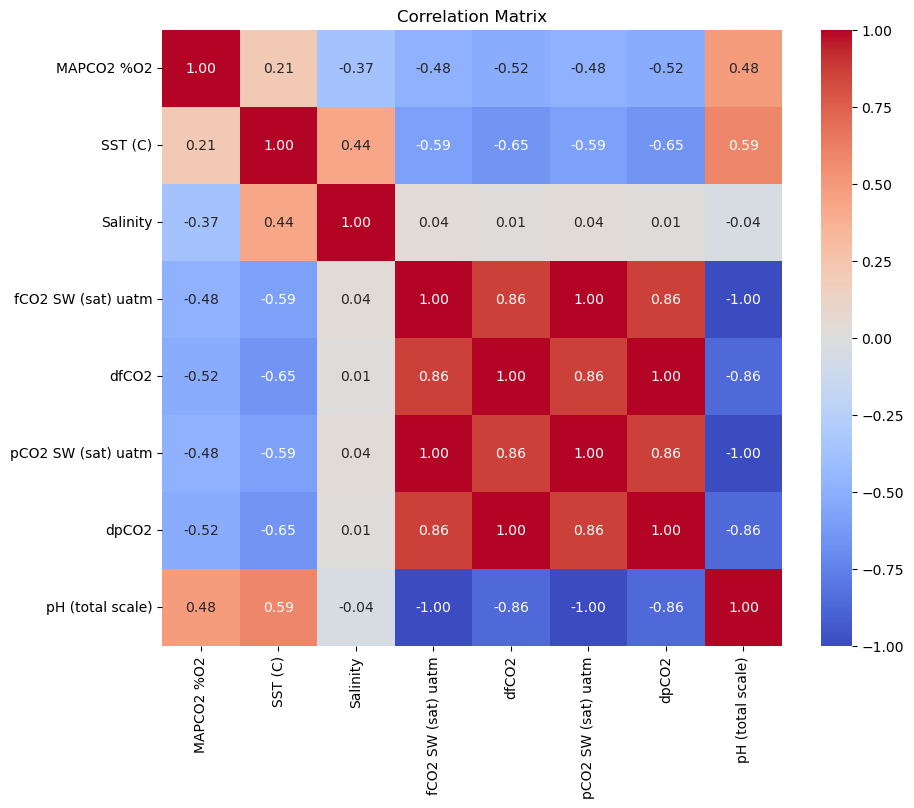

In [29]:
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [31]:
pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(data_standardized)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Show the explained variance of each principal component
print(f'Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2f}')


Explained variance by PC1: 0.68
Explained variance by PC2: 0.18


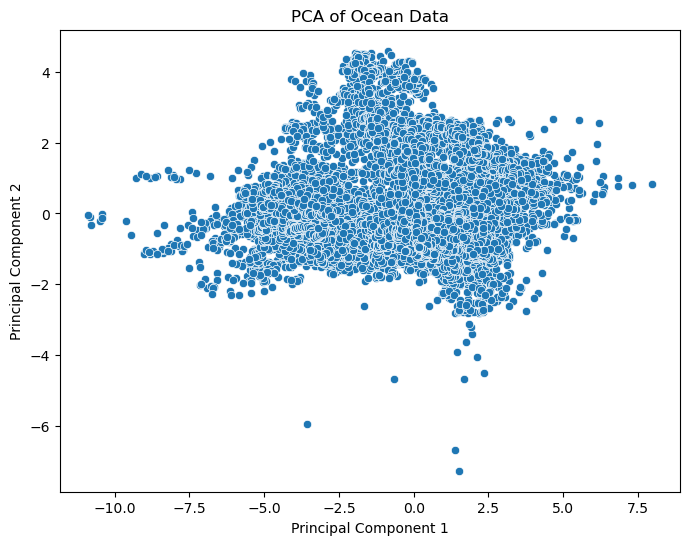

In [33]:
# Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Ocean Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [35]:
cov_matrix = data_standardized.cov()
print("\nCovariance Matrix:")
cov_matrix


Covariance Matrix:


,MAPCO2 %O2,SST (C),Salinity,fCO2 SW (sat) uatm,dfCO2,pCO2 SW (sat) uatm,dpCO2,pH (total scale)
MAPCO2 %O2,1.000000,0.212265,-0.369064,-0.484826,-0.521738,-0.484921,-0.521738,0.484826
SST (C),0.212265,1.000000,0.437006,-0.589916,-0.652014,-0.590647,-0.651947,0.589916
Salinity,-0.369064,0.437006,1.000000,0.042702,0.014013,0.042113,0.014084,-0.042702
fCO2 SW (sat) uatm,-0.484826,-0.589916,0.042702,1.000000,0.860561,0.999996,0.860549,-1.000000
dfCO2,-0.521738,-0.652014,0.014013,0.860561,1.000000,0.860487,0.999997,-0.860561
pCO2 SW (sat) uatm,-0.484921,-0.590647,0.042113,0.999996,0.860487,1.000000,0.860474,-0.999996
dpCO2,-0.521738,-0.651947,0.014084,0.860549,0.999997,0.860474,1.000000,-0.860549
pH (total scale),0.484826,0.589916,-0.042702,-1.000000,-0.860561,-0.999996,-0.860549,1.000000


In [37]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [39]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [41]:
principal_components = data_standardized.dot(eigenvectors)

In [43]:
print("\nEigenvalues:")
print(pd.Series(eigenvalues, index=[f'PC{i+1}' for i in range(len(eigenvalues))]))


Eigenvalues:
PC1    5.412225e+00
PC2    1.473689e+00
PC3    5.554104e-01
PC4    3.189211e-01
PC5    2.397464e-01
PC6    4.220950e-06
PC7    3.441719e-06
PC8   -6.151201e-17
dtype: float64


In [45]:
print("\nPrincipal Components:")
principal_components



Principal Components:


,0,1,2,3,4,5,6,7
0,1.613759,-4.119470,0.680113,-0.136498,-0.330535,0.002584,-0.000494,-8.514681e-14
1,1.314362,-4.208891,0.620419,-0.085556,-0.454999,-0.002082,0.000089,-4.108875e-13
2,1.240751,-4.184614,0.500923,-0.002998,-0.568773,-0.002268,0.000403,-5.963230e-13
3,1.208818,-4.081455,0.520058,0.101831,-0.584888,0.002495,0.000513,2.428854e-13
4,0.989565,-3.856298,0.436951,0.117507,-0.548815,-0.001934,0.000796,8.605950e-15
...,...,...,...,...,...,...,...,...
16923,-0.146961,-0.264042,-0.453010,-0.230003,-0.037162,0.000243,-0.000018,1.386337e-14
16924,-0.135498,-0.243447,-0.417677,-0.212063,-0.034263,0.000224,-0.000017,1.259576e-14
16925,-0.679588,1.140554,-1.324016,0.568356,-0.025325,-0.003143,-0.001812,-2.559681e-13
16926,-0.717648,1.111022,-1.290839,0.665857,-0.083826,-0.003295,-0.001595,-3.989847e-13


In [47]:
explained_variance_ratio = eigenvalues / sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nExplained Variance Ratio:")
print(pd.Series(explained_variance_ratio, index=[f'PC{i+1}' for i in range(len(explained_variance_ratio))]))

print("\nCumulative Explained Variance:")
print(pd.Series(cumulative_explained_variance, index=[f'PC{i+1}' for i in range(len(cumulative_explained_variance))]))



Explained Variance Ratio:
PC1    6.765282e-01
PC2    1.842111e-01
PC3    6.942630e-02
PC4    3.986513e-02
PC5    2.996830e-02
PC6    5.276188e-07
PC7    4.302149e-07
PC8   -7.689002e-18
dtype: float64

Cumulative Explained Variance:
PC1    0.676528
PC2    0.860739
PC3    0.930166
PC4    0.970031
PC5    0.999999
PC6    1.000000
PC7    1.000000
PC8    1.000000
dtype: float64


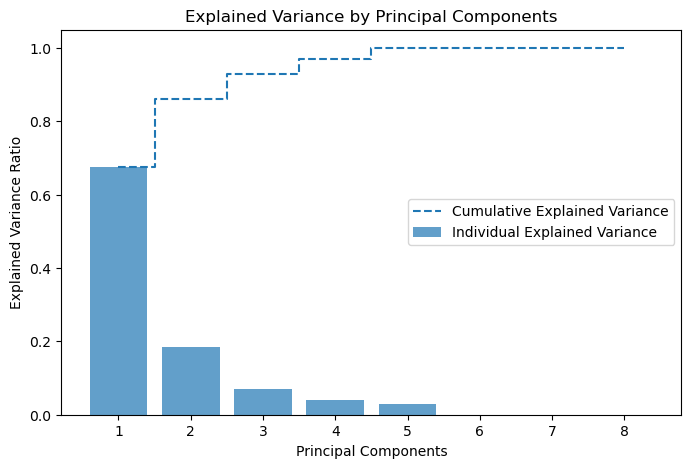

In [49]:
explained_variance_ratio = [0.6765282, 0.1842111, 0.0694263, 0.0398651, 0.0299683, 5.276188e-07, 4.302149e-07, -7.689002e-18]

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the bar and cumulative line plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance', linestyle='--')

# Adjust x-axis labels and title
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()


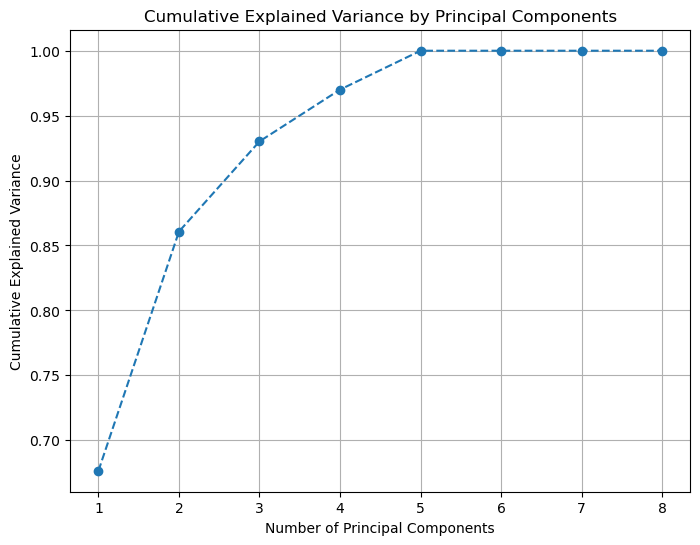

In [51]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

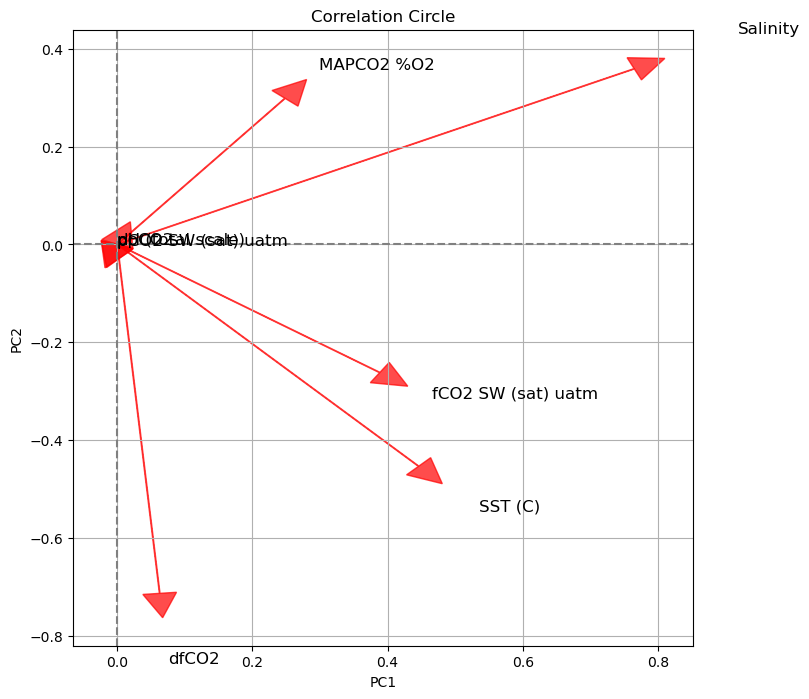

In [53]:
# Correlation circle plot
plt.figure(figsize=(8, 8))
for i in range(len(eigenvectors)):
    plt.arrow(0, 0, eigenvectors[0, i], eigenvectors[1, i], head_width=0.05, head_length=0.05, color='r', alpha=0.7)
    plt.text(eigenvectors[0, i] * 1.2, eigenvectors[1, i] * 1.2, data.columns[i], fontsize=12)

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title("Correlation Circle")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

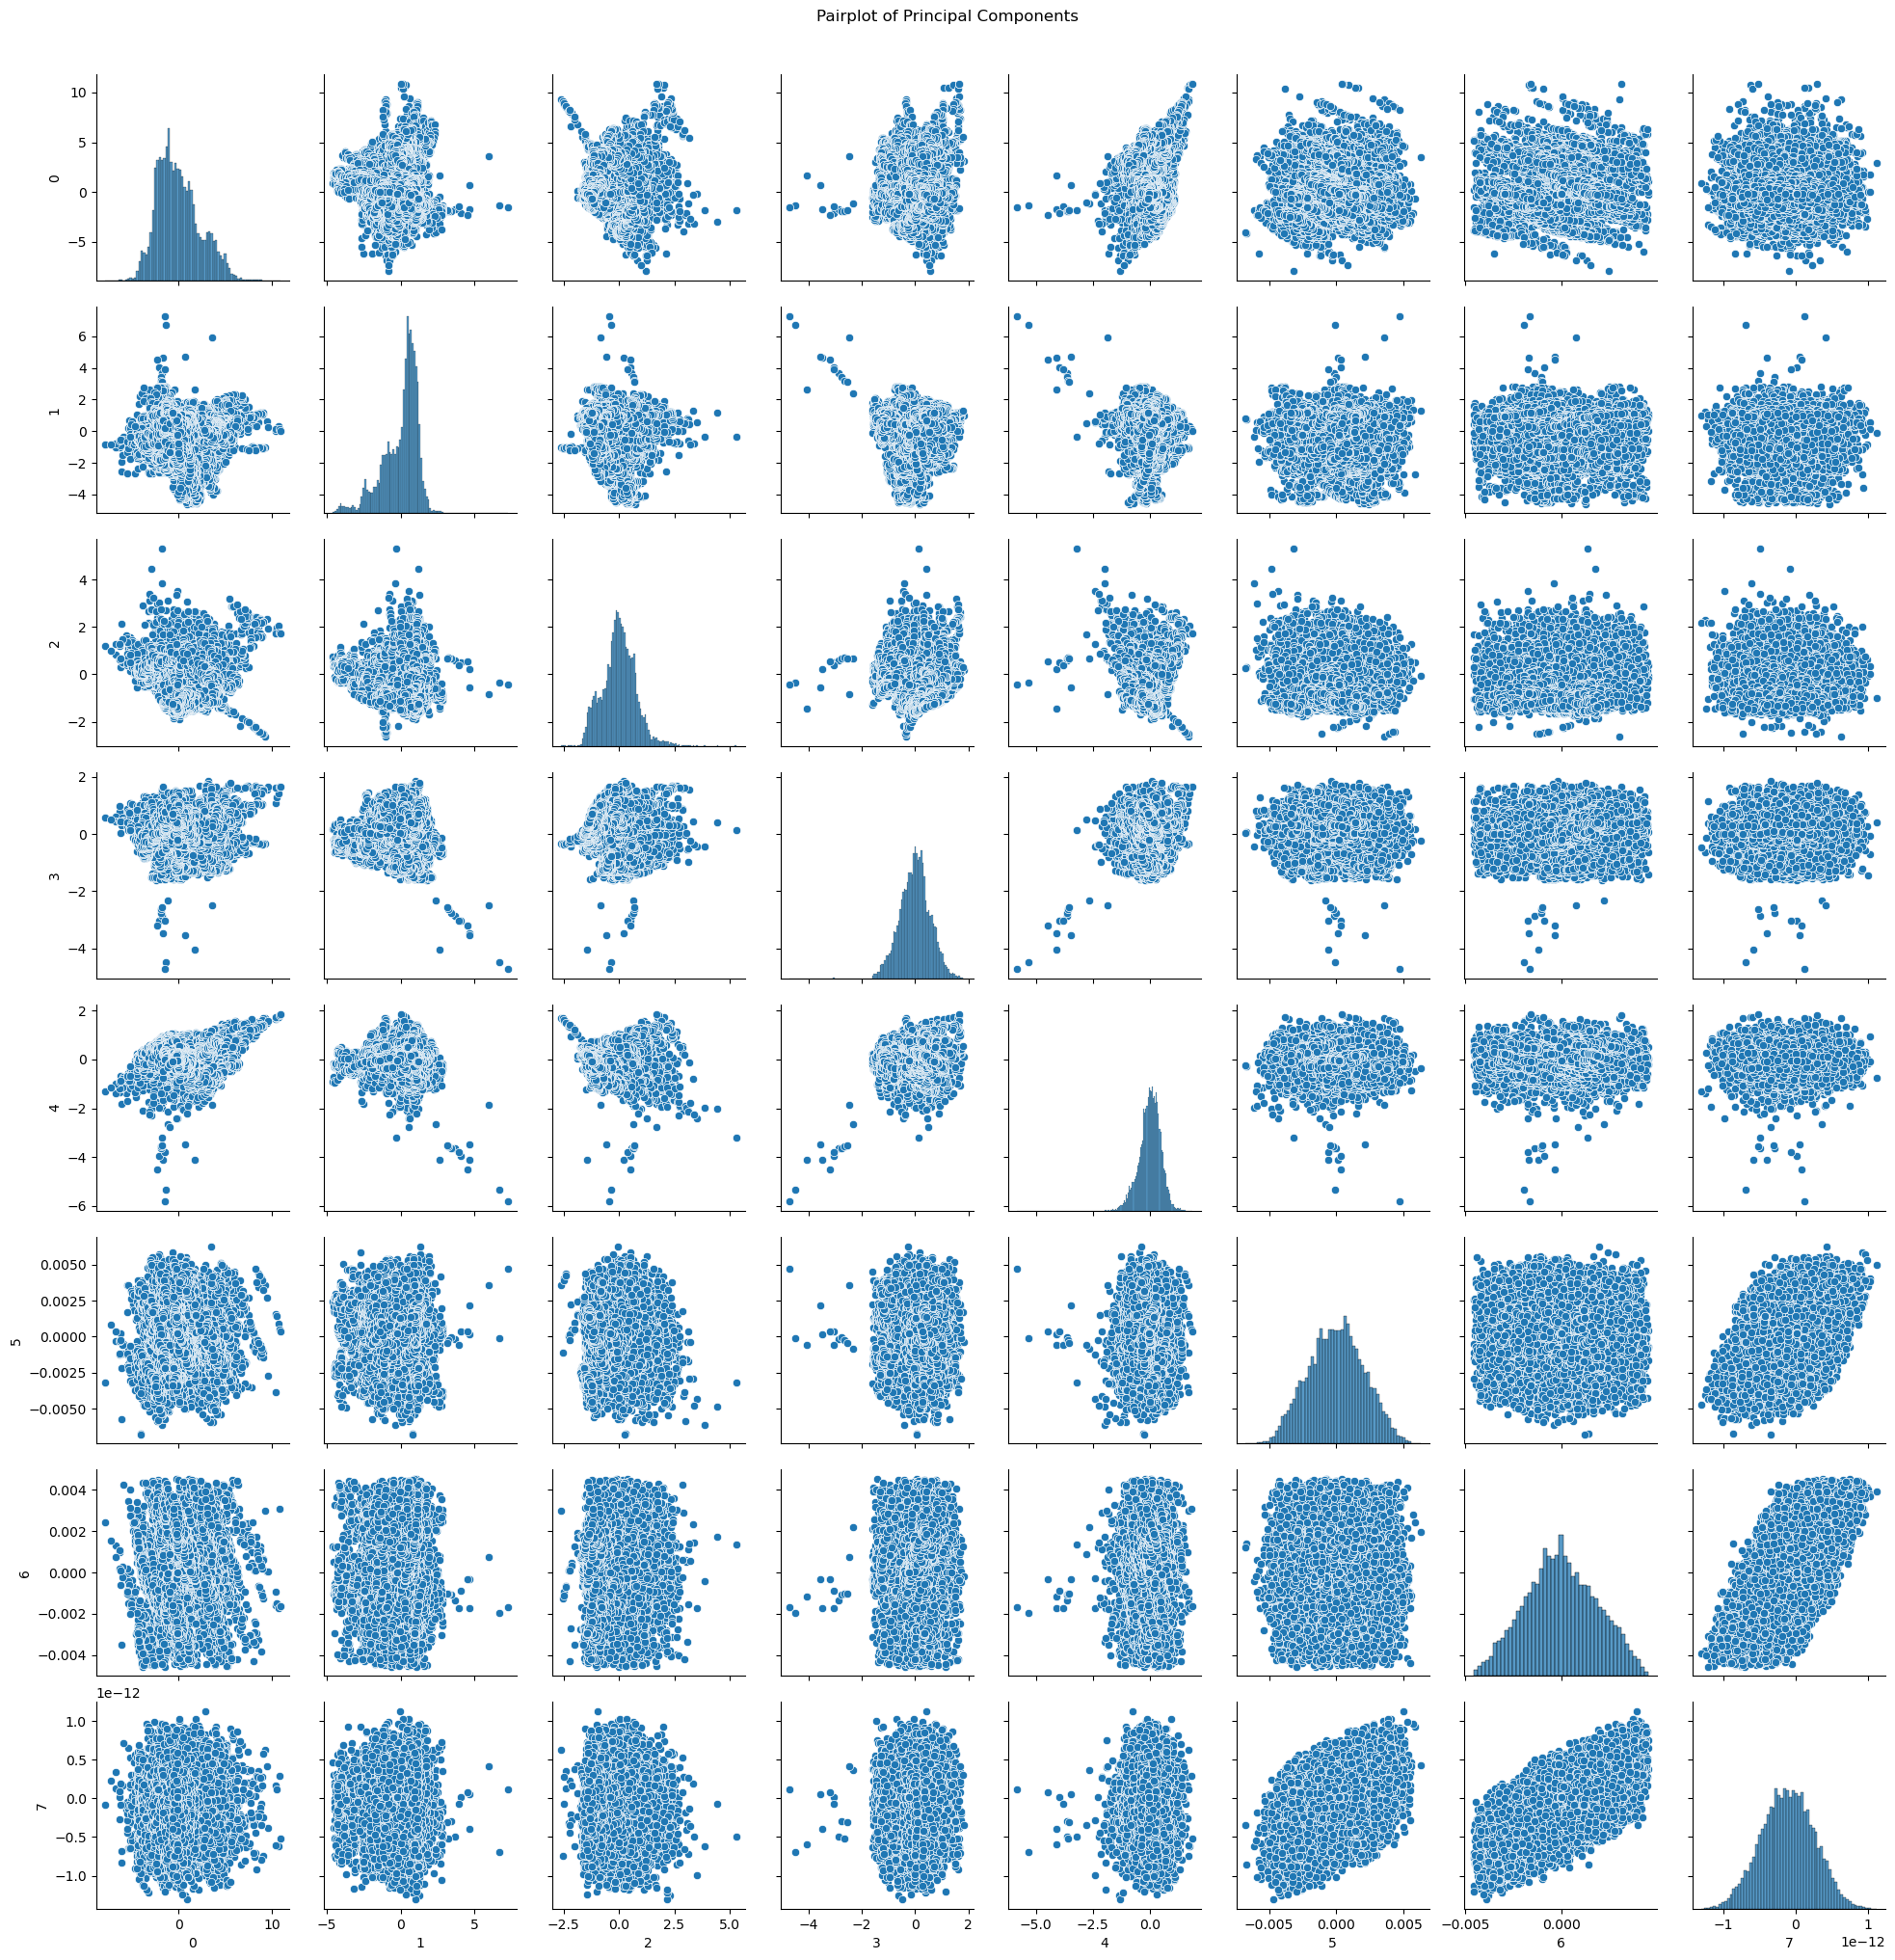

In [55]:
# Step 11: Visualize the principal components
# Pairplot to observe relationships between principal components
sns.pairplot(pd.DataFrame(principal_components))
plt.suptitle("Pairplot of Principal Components", y=1.02)
plt.show()


In [57]:
df.head()

,Mooring Name,Latitude,Longitude,Date,Time,Time_of_Day,MAPCO2 %O2,SST (C),Salinity,fCO2 SW (sat) uatm,dfCO2,pCO2 SW (sat) uatm,dpCO2,pH (total scale)
0,SOFS_142E_46S,-47.004,142.283,4/20/2021,15,Early Afternoon,98.69,14.048,35.298,369.2,-30.3,370.5,-30.4,8.36308
1,SOFS_142E_46S,-47.004,142.283,4/20/2021,18,Late Afternoon,98.53,14.054,35.303,370.6,-27.3,372.0,-27.4,8.36294
2,SOFS_142E_46S,-47.004,142.283,4/20/2021,21,Early Evening,98.45,14.035,35.291,370.0,-25.5,371.4,-25.6,8.36300
3,SOFS_142E_46S,-47.004,142.283,4/21/2021,0,Late Night,98.55,13.959,35.283,369.8,-24.5,371.1,-24.6,8.36302
4,SOFS_142E_46S,-47.004,142.283,4/21/2021,3,Late Night,98.54,13.695,35.249,370.8,-23.1,372.2,-23.2,8.36292


In [59]:
print(df[['pCO2 SW (sat) uatm', 'fCO2 SW (sat) uatm', 'SST (C)', 'pH (total scale)']].isnull().sum())
print(df.dtypes)


pCO2 SW (sat) uatm    0
fCO2 SW (sat) uatm    0
SST (C)               0
pH (total scale)      0
dtype: int64
Mooring Name           object
Latitude              float64
Longitude             float64
Date                   object
Time                    int32
Time_of_Day            object
MAPCO2 %O2            float64
SST (C)               float64
Salinity              float64
fCO2 SW (sat) uatm    float64
dfCO2                 float64
pCO2 SW (sat) uatm    float64
dpCO2                 float64
pH (total scale)      float64
dtype: object


In [61]:
print(df[['pCO2 SW (sat) uatm', 'fCO2 SW (sat) uatm', 'SST (C)', 'pH (total scale)']].head())


   pCO2 SW (sat) uatm  fCO2 SW (sat) uatm  SST (C)  pH (total scale)
0               370.5               369.2   14.048           8.36308
1               372.0               370.6   14.054           8.36294
2               371.4               370.0   14.035           8.36300
3               371.1               369.8   13.959           8.36302
4               372.2               370.8   13.695           8.36292


In [63]:
import pandas as pd

# Check for missing values in critical columns
print(df[['pCO2 SW (sat) uatm', 'fCO2 SW (sat) uatm', 'SST (C)', 'pH (total scale)']].isnull().sum())

# Define thresholds to create the 'Dead Zone' target column if not present
pco2_threshold = 400  # Example threshold for pCO2
fco2_threshold = 350  # Example threshold for fCO2
sst_threshold = 25    # Example threshold for SST
ph_threshold = 7.5    # Example threshold for pH

# Only create the 'Dead Zone' column if it doesn't already exist
if 'Dead Zone' not in df.columns:
    df['Dead Zone'] = (
        (df['pCO2 SW (sat) uatm'] > pco2_threshold) &
        (df['fCO2 SW (sat) uatm'] > fco2_threshold) &
        (df['SST (C)'] > sst_threshold) &
        (df['pH (total scale)'] < ph_threshold)
    )

# Verify the column is created
print(df[['pCO2 SW (sat) uatm', 'fCO2 SW (sat) uatm', 'SST (C)', 'pH (total scale)', 'Dead Zone']].head())

# Save the updated dataset if needed
df.to_csv('OceanDeadZones.csv', index=False)


pCO2 SW (sat) uatm    0
fCO2 SW (sat) uatm    0
SST (C)               0
pH (total scale)      0
dtype: int64
   pCO2 SW (sat) uatm  fCO2 SW (sat) uatm  SST (C)  pH (total scale)  \
0               370.5               369.2   14.048           8.36308   
1               372.0               370.6   14.054           8.36294   
2               371.4               370.0   14.035           8.36300   
3               371.1               369.8   13.959           8.36302   
4               372.2               370.8   13.695           8.36292   

   Dead Zone  
0      False  
1      False  
2      False  
3      False  
4      False  


In [65]:
df.to_csv('OceanDeadZones.csv', index=False)

In [67]:
dead_zone_counts = df['Dead Zone'].value_counts()
dead_zone_counts

Dead Zone
False    16928
Name: count, dtype: int64

In [69]:
# Convert 'Dead Zone' from True/False to 1/0
df['Dead Zone'] = df['Dead Zone'].astype(int)

# Check the first few rows to ensure the change
print(df[['Dead Zone']].head())


   Dead Zone
0          0
1          0
2          0
3          0
4          0


In [71]:
df.to_csv('OceanDeadZones.csv', index=False)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define features (X) and target (y)
X = df[['pCO2 SW (sat) uatm', 'fCO2 SW (sat) uatm', 'SST (C)', 'pH (total scale)']]
y = df['Dead Zone'].astype(int)  # Ensure the target is numeric


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Predict new data (example)
new_data = pd.DataFrame({
    'pCO2 SW (sat) uatm': [450],
    'fCO2 SW (sat) uatm': [370],
    'SST (C)': [26],
    'pH (total scale)': [7.2]
})

prediction = model.predict(new_data)
print("\nPrediction for new data:", "Dead Zone" if prediction[0] == 1 else "Not Dead Zone")


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386

    accuracy                           1.00      3386
   macro avg       1.00      1.00      1.00      3386
weighted avg       1.00      1.00      1.00      3386


Prediction for new data: Not Dead Zone


In [81]:
from sklearn.ensemble import IsolationForest

# Train an Isolation Forest on "Not Dead Zone" data
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies
y_pred = model.predict(X)

# Convert predictions: -1 (anomaly) -> "Dead Zone", 1 -> "Not Dead Zone"
df['Predicted Dead Zone'] = (y_pred == -1).astype(int)
print(df[['pCO2 SW (sat) uatm', 'fCO2 SW (sat) uatm', 'SST (C)', 'pH (total scale)', 'Predicted Dead Zone']])


       pCO2 SW (sat) uatm  fCO2 SW (sat) uatm    SST (C)  pH (total scale)  \
0              370.500000          369.200000  14.048000          8.363080   
1              372.000000          370.600000  14.054000          8.362940   
2              371.400000          370.000000  14.035000          8.363000   
3              371.100000          369.800000  13.959000          8.363020   
4              372.200000          370.800000  13.695000          8.362920   
...                   ...                 ...        ...               ...   
16923          376.952426          375.519513  10.718768          8.362448   
16924          376.952426          375.519513  10.718768          8.362448   
16925          372.400000          370.900000   9.178000          8.362910   
16926          372.300000          370.800000   9.213000          8.362920   
16927          372.000000          370.500000   9.207000          8.362950   

       Predicted Dead Zone  
0                        0  
1    

In [133]:
import pandas as pd
import numpy as np

# Load the original dataset
df = pd.read_csv('OceanDeadZones.csv')

# Define ranges for Dead Zone conditions based on your domain knowledge
dead_zone_conditions = {
    'MAPCO2 %O2': (80, 95),  # Lower oxygen levels (relative to healthy oceans)
    'SST (C)': (25, 30),     # Elevated temperature
    'Salinity': (35, 37),     # Slightly elevated salinity
    'fCO2 SW (sat) uatm': (450, 600),  # High fCO2 levels (carbon dioxide)
    'pCO2 SW (sat) uatm': (450, 600),  # High pCO2 levels (partial pressure of carbon dioxide)
    'pH (total scale)': (6.8, 7.5)      # Lower pH (acidic conditions)
}

# Generate synthetic dead zone data
num_synthetic_samples = 2000  # Increase the number of synthetic samples

synthetic_data = {
    'Mooring Name': ['Synthetic_DeadZone'] * num_synthetic_samples,
    'Latitude': np.random.uniform(df['Latitude'].min(), df['Latitude'].max(), num_synthetic_samples),
    'Longitude': np.random.uniform(df['Longitude'].min(), df['Longitude'].max(), num_synthetic_samples),
    'Date': ['Synthetic'] * num_synthetic_samples,
    'Time': np.random.randint(0, 24, num_synthetic_samples),
    'Time_of_Day': ['Synthetic'] * num_synthetic_samples,
    'MAPCO2 %O2': np.random.uniform(*dead_zone_conditions['MAPCO2 %O2'], num_synthetic_samples),
    'SST (C)': np.random.uniform(*dead_zone_conditions['SST (C)'], num_synthetic_samples),
    'Salinity': np.random.uniform(*dead_zone_conditions['Salinity'], num_synthetic_samples),
    'fCO2 SW (sat) uatm': np.random.uniform(*dead_zone_conditions['fCO2 SW (sat) uatm'], num_synthetic_samples),
    'dfCO2': np.random.uniform(df['dfCO2'].min(), df['dfCO2'].max(), num_synthetic_samples),  # Use observed range
    'pCO2 SW (sat) uatm': np.random.uniform(*dead_zone_conditions['pCO2 SW (sat) uatm'], num_synthetic_samples),
    'dpCO2': np.random.uniform(df['dpCO2'].min(), df['dpCO2'].max(), num_synthetic_samples),  # Use observed range
    'pH (total scale)': np.random.uniform(*dead_zone_conditions['pH (total scale)'], num_synthetic_samples),
    'Dead Zone': [1] * num_synthetic_samples  # Label as Dead Zone
}

# Create a DataFrame from the synthetic data
synthetic_df = pd.DataFrame(synthetic_data)

# Combine the synthetic data with the original dataset
combined_df = pd.concat([df, synthetic_df], ignore_index=True)

# Shuffle the combined data to mix synthetic and real data
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the combined dataset to a new CSV file
combined_df.to_csv('ComOceanDeadZones.csv', index=False)

print("Synthetic data generated and saved successfully!")


Synthetic data generated and saved successfully!


In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib  # To save the model

# Load the dataset
df = pd.read_csv('ComOceanDeadZones.csv')

# Define features (X) and target (y)
X = df[['MAPCO2 %O2', 'SST (C)', 'Salinity', 'fCO2 SW (sat) uatm', 'pCO2 SW (sat) uatm', 'pH (total scale)']]
y = df['Dead Zone']

# Handle missing values (if any)
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the trained model and scaler
joblib.dump(model, 'dead_zone_classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00       400

    accuracy                           1.00      3786
   macro avg       1.00      1.00      1.00      3786
weighted avg       1.00      1.00      1.00      3786


Confusion Matrix:
 [[3386    0]
 [   0  400]]
Model and scaler saved successfully!


In [137]:
#Logistic and Random 

In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('ComOceanDeadZones.csv')

# Define features (X) and target (y)
X = df[['MAPCO2 %O2', 'SST (C)', 'Salinity', 'fCO2 SW (sat) uatm', 'pCO2 SW (sat) uatm', 'pH (total scale)']]
y = df['Dead Zone']

# Check class distribution before SMOTE
print("Original class distribution:\n", y.value_counts())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after SMOTE
print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())

# Logistic Regression with class weight adjustment
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Random Forest Classifier with class weight adjustment
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Adjusted prediction threshold for Logistic Regression
y_pred_logistic_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_pred_logistic_adjusted = (y_pred_logistic_proba > 0.3).astype(int)  # Adjust threshold to 0.3

# Adjusted prediction threshold for Random Forest
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf_adjusted = (y_pred_rf_proba > 0.3).astype(int)  # Adjust threshold to 0.3

# Evaluate Logistic Regression
print("\nLogistic Regression Results (Adjusted Threshold):")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic_adjusted))

# Evaluate Random Forest
print("\nRandom Forest Results (Adjusted Threshold):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_adjusted))


Original class distribution:
 Dead Zone
0    16928
1     2000
Name: count, dtype: int64
Resampled class distribution:
 Dead Zone
0    13542
1    13542
Name: count, dtype: int64

Logistic Regression Results (Adjusted Threshold):
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00       400

    accuracy                           1.00      3786
   macro avg       1.00      1.00      1.00      3786
weighted avg       1.00      1.00      1.00      3786

Confusion Matrix:
 [[3386    0]
 [   0  400]]

Random Forest Results (Adjusted Threshold):
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00       400

    accuracy                           1.00      3786
   macro avg       1.00      1.00      1.00      3786
weight

In [140]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-validation
logistic_cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=5)
print(f"Logistic Regression Cross-validation Scores: {logistic_cv_scores}")
print(f"Mean CV Score: {logistic_cv_scores.mean()}")

# Random Forest Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f"Random Forest Cross-validation Scores: {rf_cv_scores}")
print(f"Mean CV Score: {rf_cv_scores.mean()}")


Logistic Regression Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Random Forest Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [143]:
df = pd.read_csv('ComOceanDeadZones.csv')